In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/UV7583-XLS-ENG (1).xlsx'
df = pd.read_excel(path, sheet_name=1, index_col='ID')
df.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
ID,,,,,,,,
1,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
2,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
3,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
4,10.0,NaN,10.0,NaN,2011-01-06,2011-01-06,NaT,NaT
5,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01


In [ ]:
variables_fechas = df.select_dtypes(include=["datetime64[ns]"])
columnas_fechas = variables_fechas.columns
columnas_fechas

Index(['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'], dtype='object')

In [ ]:
def format_date(x): #Fechas a str mes y año “2010-06-18” -> “June 2010” Identificar estacionalidad, convertir a variable categórica, simplificar su uso
  if pd.notnull(x):
    return pd.to_datetime(x, format='%d/%m/%y').strftime('%B %Y')

df[columnas_fechas] = df[columnas_fechas].applymap(format_date)
df.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
ID,,,,,,,,
1,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010
2,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,None
3,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,None
4,10.0,NaN,10.0,NaN,January 2011,January 2011,None,None
5,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010


In [ ]:
def group_size(x):
  if pd.isnull(x['>= 35 FPP Date']) and pd.isnull(x['>= 20 FPP Date']) and pd.isnull(x['>= 10 FPP Date']) and pd.notnull(x['>= 3 FPP Date']):
    return '>= 3'
  elif pd.isnull(x['>= 35 FPP Date']) and pd.isnull(x['>= 20 FPP Date']) and pd.notnull(x['>= 10 FPP Date']) and pd.notnull(x['>= 3 FPP Date']):
    return '>= 10'
  elif pd.isnull(x['>= 35 FPP Date']) and pd.notnull(x['>= 20 FPP Date']) and pd.notnull(x['>= 10 FPP Date']) and pd.notnull(x['>= 3 FPP Date']):
    return'>= 20'
  elif pd.notnull(x['>= 35 FPP Date']) and pd.notnull(x['>= 20 FPP Date']) and pd.notnull(x['>= 10 FPP Date']) and pd.notnull(x['>= 3 FPP Date']):
    return'>= 35'

df['group_SizeRange'] = df.apply(group_size, axis=1) #Columna calculada para determinar el tamaño de grupo, segun la maxima fecha alcanzada

In [ ]:
df.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange
ID,,,,,,,,,
1,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35
2,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,None,>= 20
3,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,None,>= 20
4,10.0,NaN,10.0,NaN,January 2011,January 2011,None,None,>= 10
5,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35


In [ ]:
df.isnull().sum()

NPS 2011            580
NPS 2010           1232
NPS 2009           1228
NPS 2008           1415
>= 3 FPP Date        12
>= 10 FPP Date      412
>= 20 FPP Date     1027
>= 35 FPP Date     1621
group_SizeRange      12
dtype: int64

In [ ]:
path2 = '/content/UV7581-XLS-ENG (1).xlsx'

In [ ]:
df2 = pd.read_excel(path2, sheet_name=1, index_col='ID')
df2.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,NaN,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,NaN,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,NaN,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,NaN,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [ ]:
df2.isnull().sum()

Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag                  3
MDR.Low.Grade            

In [ ]:
df2['Special.Pay'] = df2['Special.Pay'].fillna('N/A') #LLenar valores faltantes con nueva categoria para special pay acorde a su definicion en "Exhibit 2 -- Data Dictionary"

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1 to Data source: Company data adjusted by author using unspecified constants.
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Program.Code                    2389 non-null   object        
 1   From.Grade                      2262 non-null   float64       
 2   To.Grade                        2239 non-null   float64       
 3   Group.State                     2389 non-null   object        
 4   Is.Non.Annual.                  2389 non-null   float64       
 5   Days                            2389 non-null   float64       
 6   Travel.Type                     2389 non-null   object        
 7   Departure.Date                  2389 non-null   datetime64[ns]
 8   Return.Date                     2389 non-null   datetime64[ns]
 9   Deposit.Date                    2389 non-null   datetime64[ns]
 10  Special.

In [ ]:
df2.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,N/A,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,N/A,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,N/A,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,N/A,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [ ]:
variables_fechas2 = df2.select_dtypes(include=["datetime64[ns]"])
columnas_fechas2 = variables_fechas2.columns
columnas_fechas2

Index(['Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL',
       'Latest.RPL', 'Initial.System.Date', 'FirstMeeting', 'LastMeeting'],
      dtype='object')

In [ ]:
df2[columnas_fechas2] = df2[columnas_fechas2].applymap(format_date)
df2.head()  #mismo trato a las fechas que en tabla NPS

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2,HC,8.0,8.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3,HD,8.0,8.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4,HN,9.0,12.0,VA,1.0,3.0,B,January 2011,January 2011,January 2011,N/A,376.0,0.0,0.0,0.000,None,None,1.0,0.0,October 2010,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,None,None,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
5,HD,6.0,8.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [ ]:
df2.isnull().sum()

Program.Code                        3
From.Grade                        130
To.Grade                          153
Group.State                         3
Is.Non.Annual.                      3
Days                                3
Travel.Type                         3
Departure.Date                      3
Return.Date                         3
Deposit.Date                        3
Special.Pay                         0
Tuition                             3
FRP.Active                          3
FRP.Cancelled                       3
FRP.Take.up.percent.                3
Early.RPL                         676
Latest.RPL                         22
Cancelled.Pax                       3
Total.Discount.Pax                  3
Initial.System.Date                11
Poverty.Code                      602
Region                              3
CRM.Segment                         7
School.Type                         3
Parent.Meeting.Flag                 3
MDR.Low.Grade                      71
MDR.High.Gra

In [ ]:
df_merge = pd.merge(df, df2, left_index=True, right_index=True)
df_merge.head() #Merge de ambas tables por customer ID

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35,HS,4.0,4.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2.0,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,None,>= 20,HC,8.0,8.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3.0,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,None,>= 20,HD,8.0,8.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4.0,10.0,NaN,10.0,NaN,January 2011,January 2011,None,None,>= 10,HN,9.0,12.0,VA,1.0,3.0,B,January 2011,January 2011,January 2011,N/A,376.0,0.0,0.0,0.000,None,None,1.0,0.0,October 2010,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,None,None,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
5.0,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35,HD,6.0,8.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [ ]:
df_merge.corrwith(df_merge['Retained.in.2012.'])

NPS 2011                          0.084974
NPS 2010                          0.064079
NPS 2009                          0.043293
NPS 2008                          0.053584
From.Grade                        0.083220
To.Grade                         -0.200470
Is.Non.Annual.                   -0.390633
Days                             -0.049402
Tuition                          -0.119015
FRP.Active                        0.250478
FRP.Cancelled                     0.072659
FRP.Take.up.percent.             -0.016665
Cancelled.Pax                     0.048998
Total.Discount.Pax                0.216218
CRM.Segment                      -0.008913
Parent.Meeting.Flag              -0.020481
MDR.High.Grade                   -0.135009
Total.School.Enrollment           0.085860
EZ.Pay.Take.Up.Rate              -0.018060
School.Sponsor                    0.120717
FPP                               0.261127
Total.Pax                         0.260492
SPR.Group.Revenue                -0.119015
NumberOfMee

In [ ]:
df_merge.dropna(thresh=55, inplace=True) #Eliminacipon de ruido por registros con demasiados vacios

In [ ]:
pd.set_option('display.max_rows', 70)

In [ ]:
df_merge.isnull().sum()

NPS 2011                           332
NPS 2010                           815
NPS 2009                           803
NPS 2008                           970
>= 3 FPP Date                        0
>= 10 FPP Date                     195
>= 20 FPP Date                     658
>= 35 FPP Date                    1168
group_SizeRange                      0
Program.Code                         0
From.Grade                          48
To.Grade                            61
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                          0
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          355
Latest.RPL               

In [ ]:
df_objt = df_merge.select_dtypes(include=["object"]).columns
df_merge.select_dtypes(include=["object"]).isnull().sum()

>= 3 FPP Date             0
>= 10 FPP Date          195
>= 20 FPP Date          658
>= 35 FPP Date         1168
group_SizeRange           0
Program.Code              0
Group.State               0
Travel.Type               0
Departure.Date            0
Return.Date               0
Deposit.Date              0
Special.Pay               0
Early.RPL               355
Latest.RPL                4
Initial.System.Date       4
Poverty.Code            375
Region                    0
School.Type               0
MDR.Low.Grade             1
Income.Level              0
SPR.Product.Type          0
SPR.New.Existing          0
FirstMeeting             72
LastMeeting              72
SchoolGradeTypeLow        0
SchoolGradeTypeHigh       0
SchoolGradeType           0
DepartureMonth            0
GroupGradeTypeLow         0
GroupGradeTypeHigh        0
GroupGradeType            0
MajorProgramCode          0
SchoolSizeIndicator      14
dtype: int64

In [ ]:
dfnotnulls = df_merge.copy()

In [ ]:
dfnotnulls = dfnotnulls.dropna(thresh=58)

In [ ]:
dfnotnulls.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35,HS,4.0,4.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2.0,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,None,>= 20,HC,8.0,8.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3.0,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,None,>= 20,HD,8.0,8.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
5.0,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35,HD,6.0,8.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
6.0,10.0,NaN,NaN,NaN,August 2010,December 2010,None,None,>= 10,HC,10.0,12.0,LA,0.0,4.0,A,January 2011,January 2011,September 2010,N/A,2025.0,9.0,4.0,0.900,March 2010,October 2010,3.0,1.0,March 2010,C,Other,8.0,PUBLIC,1.0,10,12.0,939.0,I,0.100,0.0,East Coast,NEW,10.0,11.0,2025.0,1.0,October 2010,October 2010,91.0,91.0,High,High,High->High,January,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0


In [ ]:
pd.set_option('display.max_rows', 70)

In [ ]:
columnas_fechas_merge = ['Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL',
       'Latest.RPL', 'Initial.System.Date', 'FirstMeeting', 'LastMeeting','>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date']

In [ ]:
def format_date_toNA(row):
    for x in row.index:
        if pd.isnull(row[x]):
            row[x] = "no aplica"
    return row

df_merge[columnas_fechas_merge] = df_merge[columnas_fechas_merge].apply(format_date_toNA, axis=1)

df_merge.head()
#Solo poner "no aplica en los nulos para" '>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'
#Para el resto de fechas, tenian muy pocas vacias solo reyenar con no aplica

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35,HS,4.0,4.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2.0,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,no aplica,>= 20,HC,8.0,8.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3.0,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,no aplica,>= 20,HD,8.0,8.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
5.0,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35,HD,6.0,8.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
6.0,10.0,NaN,NaN,NaN,August 2010,December 2010,no aplica,no aplica,>= 10,HC,10.0,12.0,LA,0.0,4.0,A,January 2011,January 2011,September 2010,N/A,2025.0,9.0,4.0,0.900,March 2010,October 2010,3.0,1.0,March 2010,C,Other,8.0,PUBLIC,1.0,10,12.0,939.0,I,0.100,0.0,East Coast,NEW,10.0,11.0,2025.0,1.0,October 2010,October 2010,91.0,91.0,High,High,High->High,January,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0


In [ ]:
df_objt = df_merge.select_dtypes(include=["object"]).columns
df_merge.select_dtypes(include=["object"]).isnull().sum()

>= 3 FPP Date            0
>= 10 FPP Date           0
>= 20 FPP Date           0
>= 35 FPP Date           0
group_SizeRange          0
Program.Code             0
Group.State              0
Travel.Type              0
Departure.Date           0
Return.Date              0
Deposit.Date             0
Special.Pay              0
Early.RPL                0
Latest.RPL               0
Initial.System.Date      0
Poverty.Code           375
Region                   0
School.Type              0
MDR.Low.Grade            1
Income.Level             0
SPR.Product.Type         0
SPR.New.Existing         0
FirstMeeting             0
LastMeeting              0
SchoolGradeTypeLow       0
SchoolGradeTypeHigh      0
SchoolGradeType          0
DepartureMonth           0
GroupGradeTypeLow        0
GroupGradeTypeHigh       0
GroupGradeType           0
MajorProgramCode         0
SchoolSizeIndicator     14
dtype: int64

In [ ]:
df_merge.shape

(1849, 64)

In [ ]:
df_merge['Poverty.Code'] = df_merge['Poverty.Code'].fillna('N/A')

In [ ]:
df_merge['q_participating_grades'] = df_merge['To.Grade'] - df_merge['From.Grade'] #columna calculado rango de grados participantes

In [ ]:
column_temp = df_merge['q_participating_grades']
df_merge = df_merge.drop('q_participating_grades', axis=1)
df_merge.insert(12, 'q_participating_grades', column_temp)


In [ ]:
df_merge.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,q_participating_grades,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35,HS,4.0,4.0,0.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2.0,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,no aplica,>= 20,HC,8.0,8.0,0.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3.0,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,no aplica,>= 20,HD,8.0,8.0,0.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
5.0,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35,HD,6.0,8.0,2.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
6.0,10.0,NaN,NaN,NaN,August 2010,December 2010,no aplica,no aplica,>= 10,HC,10.0,12.0,2.0,LA,0.0,4.0,A,January 2011,January 2011,September 2010,N/A,2025.0,9.0,4.0,0.900,March 2010,October 2010,3.0,1.0,March 2010,C,Other,8.0,PUBLIC,1.0,10,12.0,939.0,I,0.100,0.0,East Coast,NEW,10.0,11.0,2025.0,1.0,October 2010,October 2010,91.0,91.0,High,High,High->High,January,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0


In [ ]:
variables_categoricas = df_merge.select_dtypes(include=['object', 'category'])
columnas_Categoricas = variables_categoricas.columns
len(variables_categoricas.columns)

33

<function matplotlib.pyplot.show(close=None, block=None)>

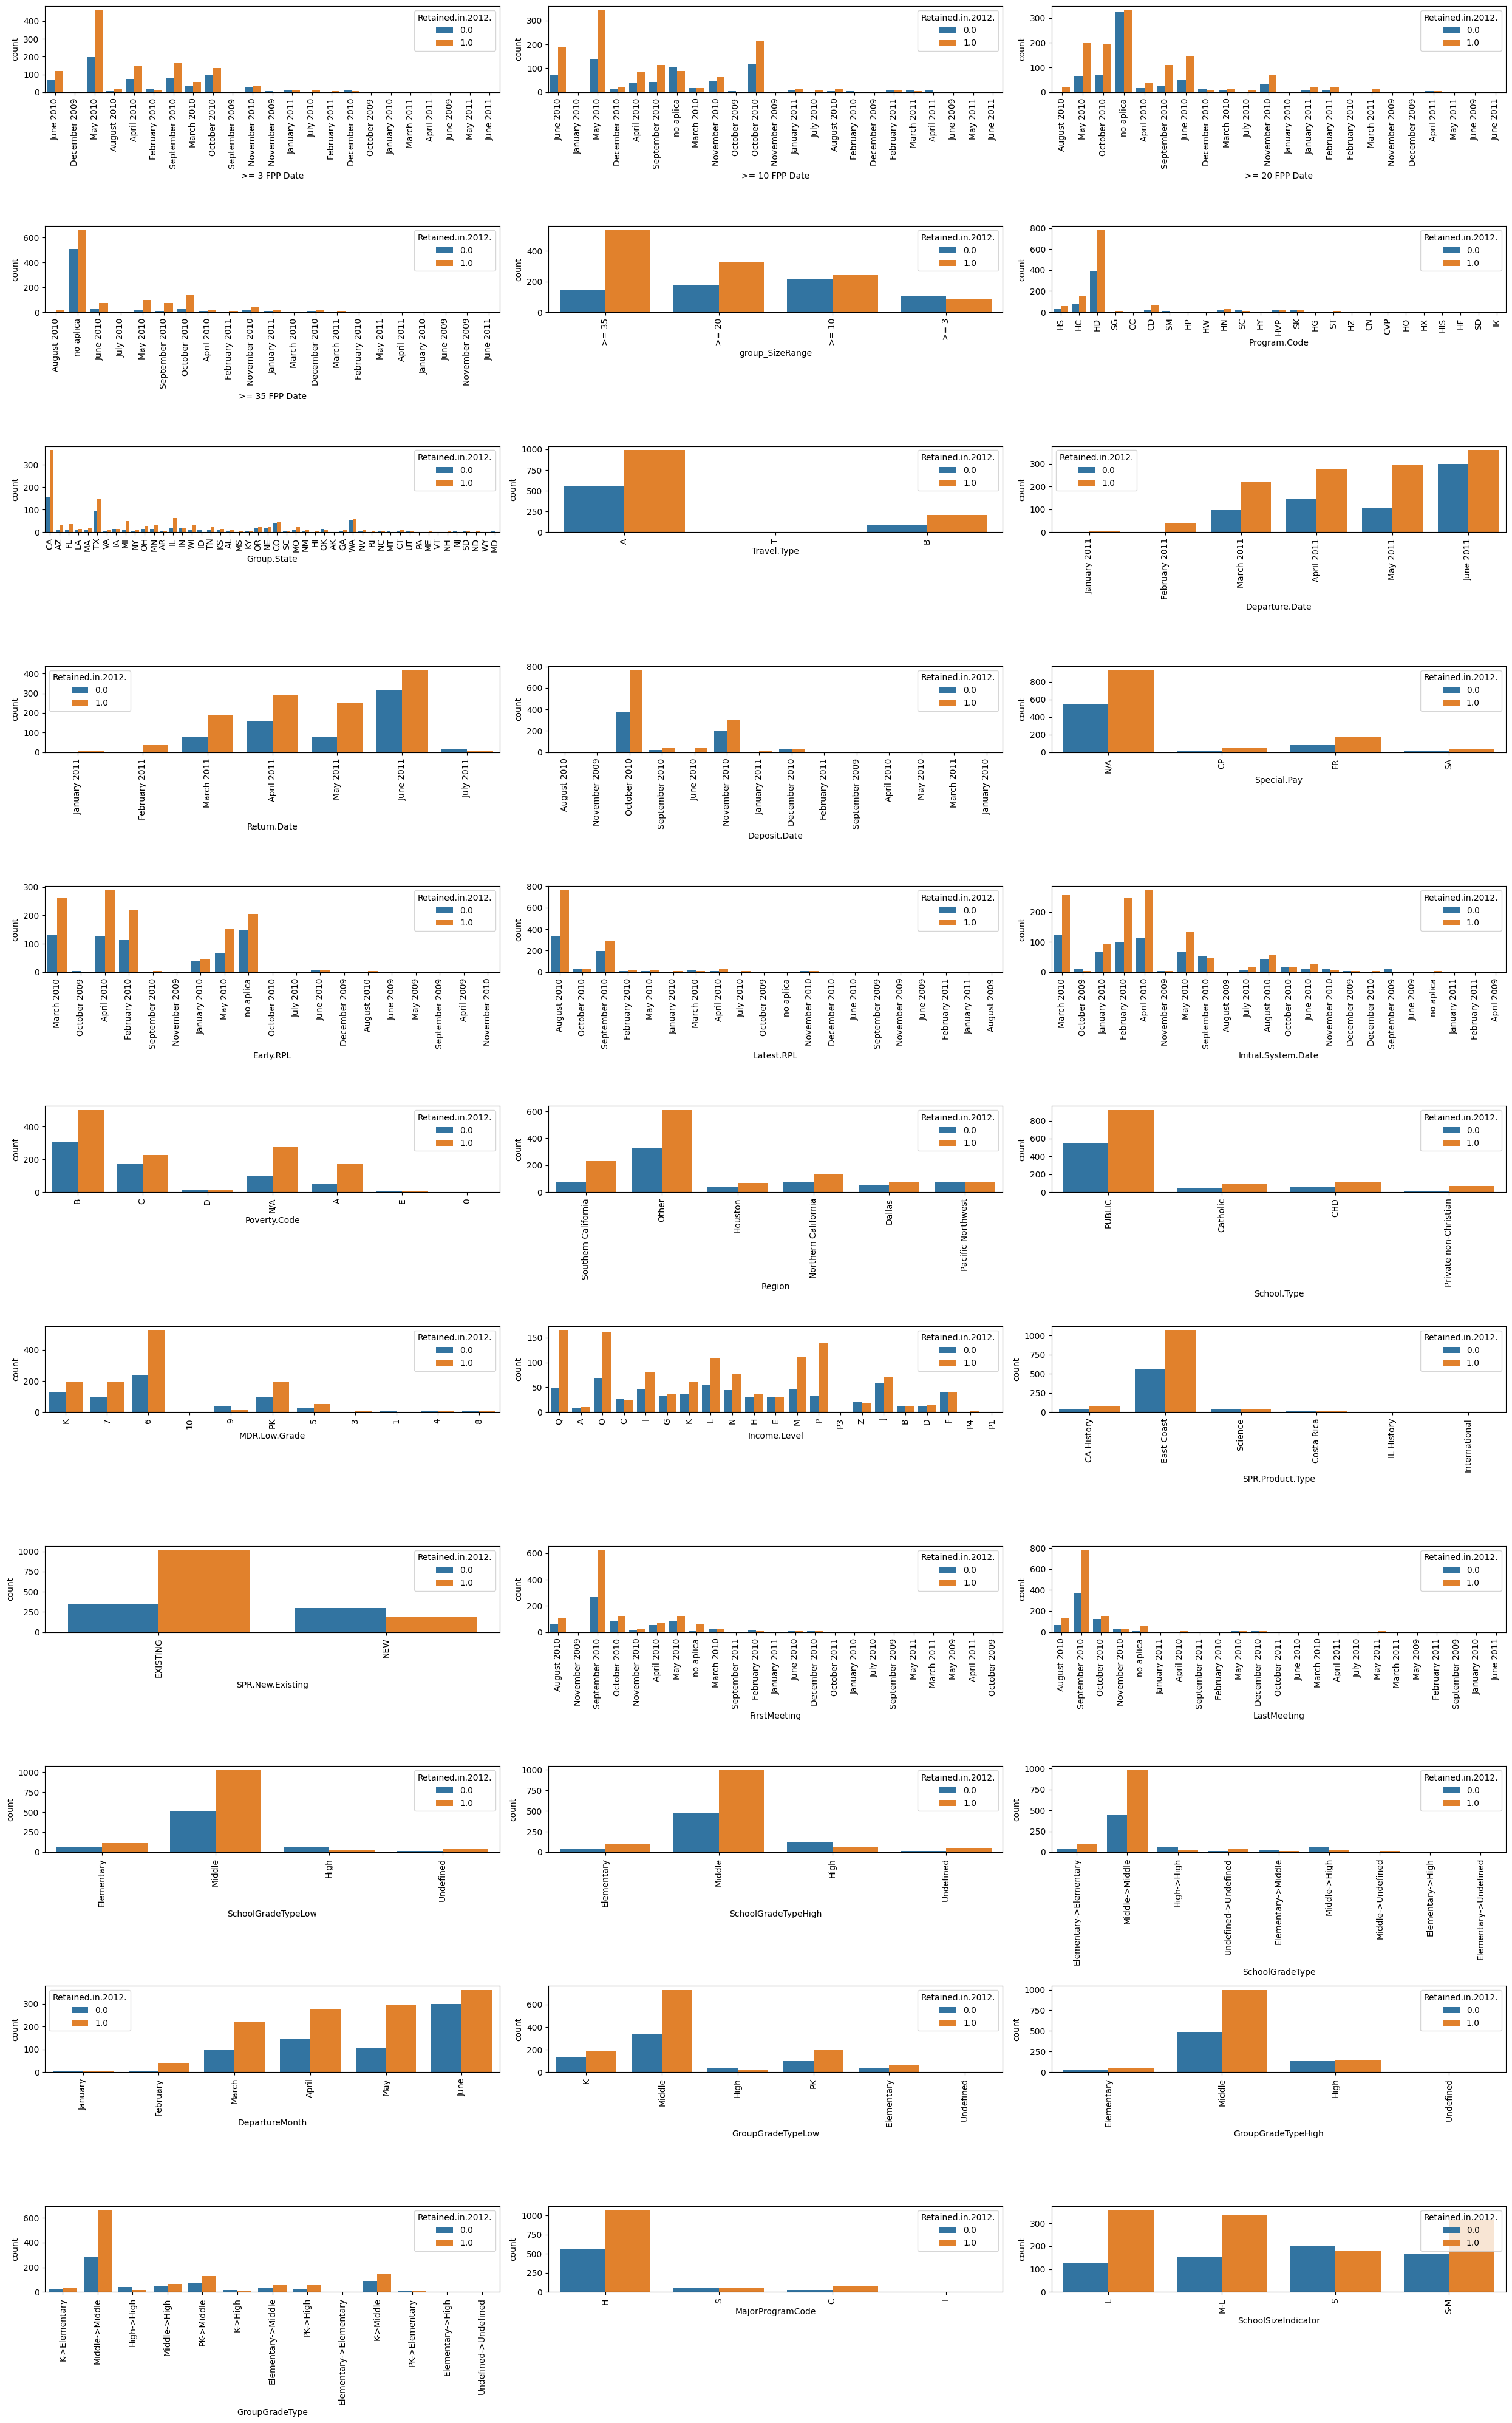

In [ ]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(25, 40))
plt.subplots_adjust(hspace=0.7)
axs = axs.flatten()

for i, var in enumerate (columnas_Categoricas):
  sns.countplot(x=var, hue='Retained.in.2012.', data = df_merge, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

fig.tight_layout()

plt.show

In [ ]:
df_objt = df_merge.select_dtypes(include=["object"]).columns
df_merge.select_dtypes(include=["object"]).isnull().sum()

>= 3 FPP Date           0
>= 10 FPP Date          0
>= 20 FPP Date          0
>= 35 FPP Date          0
group_SizeRange         0
Program.Code            0
Group.State             0
Travel.Type             0
Departure.Date          0
Return.Date             0
Deposit.Date            0
Special.Pay             0
Early.RPL               0
Latest.RPL              0
Initial.System.Date     0
Poverty.Code            0
Region                  0
School.Type             0
MDR.Low.Grade           1
Income.Level            0
SPR.Product.Type        0
SPR.New.Existing        0
FirstMeeting            0
LastMeeting             0
SchoolGradeTypeLow      0
SchoolGradeTypeHigh     0
SchoolGradeType         0
DepartureMonth          0
GroupGradeTypeLow       0
GroupGradeTypeHigh      0
GroupGradeType          0
MajorProgramCode        0
SchoolSizeIndicator    14
dtype: int64

In [ ]:
variables_continuas = df_merge.select_dtypes(include=['int', 'float'])
columnas_continuas = variables_continuas.columns


IndexError: ignored

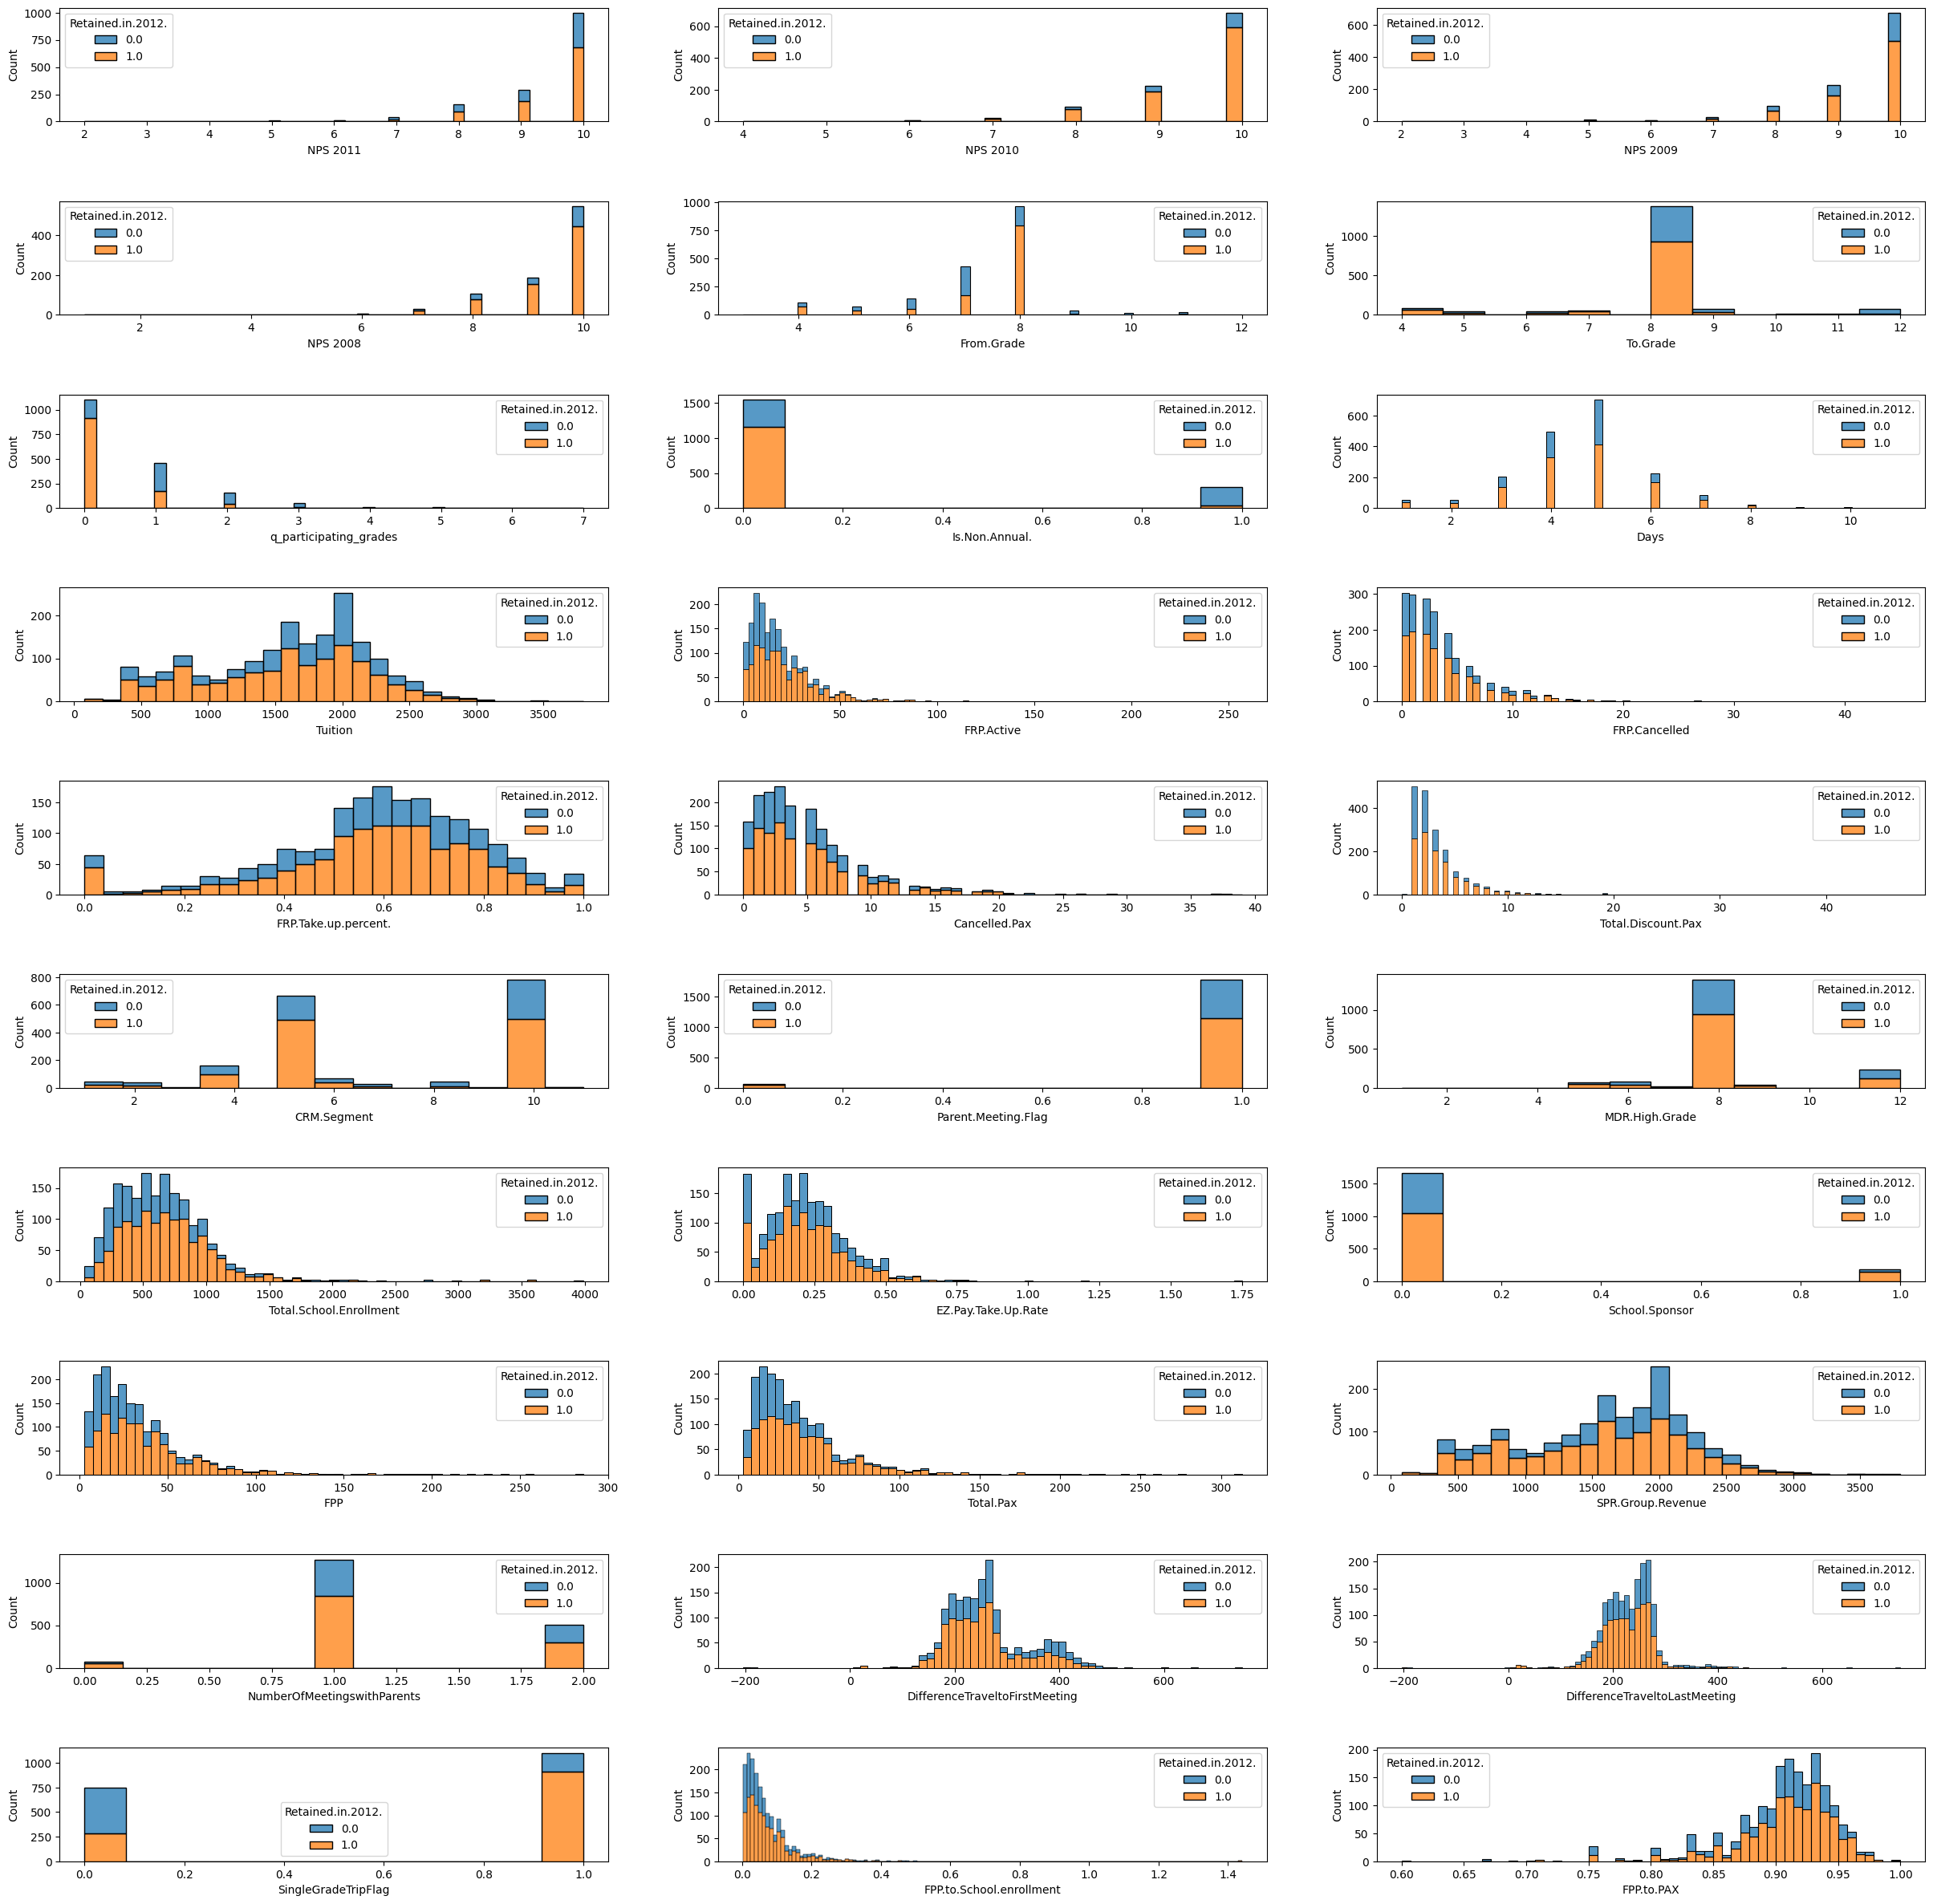

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(30, 30))
plt.subplots_adjust(hspace=0.7)

axs = axs.flatten()

for i, var in enumerate(columnas_continuas):
  sns.histplot(x=var, hue='Retained.in.2012.', data=df_merge , ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()


In [ ]:
columnas_a_rellenar = ['group_SizeRange','MDR.Low.Grade','Income.Level','SchoolSizeIndicator']
df_merge[columnas_a_rellenar] = df_merge[columnas_a_rellenar].fillna('Desconocido')

In [ ]:
df_merge.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,q_participating_grades,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,June 2010,June 2010,August 2010,August 2010,>= 35,HS,4.0,4.0,0.0,CA,0.0,1.0,A,January 2011,January 2011,August 2010,N/A,424.0,25.0,3.0,0.424,March 2010,August 2010,3.0,4.0,March 2010,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,August 2010,August 2010,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
2.0,9.0,10.0,10.0,NaN,December 2009,January 2010,May 2010,no aplica,>= 20,HC,8.0,8.0,0.0,AZ,0.0,7.0,A,January 2011,January 2011,November 2009,CP,2350.0,9.0,9.0,0.409,October 2009,August 2010,11.0,3.0,October 2009,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,November 2009,August 2010,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
3.0,NaN,10.0,10.0,NaN,June 2010,June 2010,October 2010,no aplica,>= 20,HD,8.0,8.0,0.0,FL,0.0,3.0,A,January 2011,January 2011,October 2010,N/A,1181.0,17.0,6.0,0.708,April 2010,August 2010,6.0,3.0,January 2010,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,September 2010,September 2010,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
5.0,10.0,NaN,10.0,NaN,May 2010,May 2010,May 2010,June 2010,>= 35,HD,6.0,8.0,2.0,FL,0.0,6.0,T,January 2011,January 2011,September 2010,N/A,865.0,40.0,8.0,0.494,March 2010,August 2010,9.0,8.0,March 2010,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,August 2010,August 2010,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
6.0,10.0,NaN,NaN,NaN,August 2010,December 2010,no aplica,no aplica,>= 10,HC,10.0,12.0,2.0,LA,0.0,4.0,A,January 2011,January 2011,September 2010,N/A,2025.0,9.0,4.0,0.900,March 2010,October 2010,3.0,1.0,March 2010,C,Other,8.0,PUBLIC,1.0,10,12.0,939.0,I,0.100,0.0,East Coast,NEW,10.0,11.0,2025.0,1.0,October 2010,October 2010,91.0,91.0,High,High,High->High,January,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0


In [ ]:
df_merge.select_dtypes(include=["object"]).isnull().sum()

>= 3 FPP Date          0
>= 10 FPP Date         0
>= 20 FPP Date         0
>= 35 FPP Date         0
group_SizeRange        0
Program.Code           0
Group.State            0
Travel.Type            0
Departure.Date         0
Return.Date            0
Deposit.Date           0
Special.Pay            0
Early.RPL              0
Latest.RPL             0
Initial.System.Date    0
Poverty.Code           0
Region                 0
School.Type            0
MDR.Low.Grade          0
Income.Level           0
SPR.Product.Type       0
SPR.New.Existing       0
FirstMeeting           0
LastMeeting            0
SchoolGradeTypeLow     0
SchoolGradeTypeHigh    0
SchoolGradeType        0
DepartureMonth         0
GroupGradeTypeLow      0
GroupGradeTypeHigh     0
GroupGradeType         0
MajorProgramCode       0
SchoolSizeIndicator    0
dtype: int64

In [ ]:
for columna in df_objt:
    moda = df_merge[columna].mode()[0]
    df_merge[columna] = df_merge[columna].fillna(moda)


In [ ]:
df_merge.select_dtypes(include=["object"]).isnull().sum()

>= 3 FPP Date          0
>= 10 FPP Date         0
>= 20 FPP Date         0
>= 35 FPP Date         0
group_SizeRange        0
Program.Code           0
Group.State            0
Travel.Type            0
Departure.Date         0
Return.Date            0
Deposit.Date           0
Special.Pay            0
Early.RPL              0
Latest.RPL             0
Initial.System.Date    0
Poverty.Code           0
Region                 0
School.Type            0
MDR.Low.Grade          0
Income.Level           0
SPR.Product.Type       0
SPR.New.Existing       0
FirstMeeting           0
LastMeeting            0
SchoolGradeTypeLow     0
SchoolGradeTypeHigh    0
SchoolGradeType        0
DepartureMonth         0
GroupGradeTypeLow      0
GroupGradeTypeHigh     0
GroupGradeType         0
MajorProgramCode       0
SchoolSizeIndicator    0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_merge['Poverty.Code'] = df_merge['Poverty.Code'].astype(str) #Variables objeto con enteros como valores
df_merge['MDR.Low.Grade'] = df_merge['MDR.Low.Grade'].astype(str)


In [ ]:
for x in df_objt: #codificar variables categoricas
  df_merge[x] = label_encoder.fit_transform(df_merge[x])
  print(df_merge[x].unique())

[11  3 15  2  0  5 22 13 20 21 18 17  8  9  6  4 19  7 14  1 10 16 12]
[11  7 15  4  0 21 22 13 18 19 20 17  8  9  2  5  3  6 14  1 10 16 12]
[ 2 15 19 21  0 20 11  4 13  9 18  7  8  6  5 14 17  3  1 16 10 12]
[ 2 20 10  8 14 19 18  0  5 17  7 12  3 13  4 15  1  6  9 16 11]
[3 1 0 2]
[12  4  5 21  0  1 23 11 14  9 19 16 13 22  7 24 17  2  3 10 15  8  6 20
 18]
[ 4  3  7 16 17 41 43 10 20 32 33 21  2 12 13 46 11 40 14  1 23 15 35 27
  5 38 22 30  9 34  0  8 45 31 37 25 24  6 42 36 19 44 28 29 39 26 47 18]
[0 2 1]
[2 1 4 0 5 3]
[2 1 5 0 6 4 3]
[ 1  9 11 13  6 10  5  2  3 12  0  8  7  4]
[2 0 1 3]
[ 9 14  1  4 17 12  5 11 18 15  6  8  3  2  7 10 16  0 13]
[ 2 16 18  4 12  6 11  0  8 15 19 14  3 10 17 13  9  5  7  1]
[13 17  8  6  1 15 14 20  2 10  3 18 12 16  4  5 19 11 21  9  7  0]
[2 3 4 6 1 5 0]
[5 3 1 2 0 4]
[2 1 0 3]
[10  6  5  1  8 11  4  2  0  9  3  7]
[19  0 14  2  8  6 10 11 13  7  4 12 15 17 20  9  1  3  5 18 16]
[0 2 5 1 3 4]
[0 1]
[ 2 14 20 17 15  0 12 22  9 21  4  6  8  3 18 

In [ ]:
df_merge.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,q_participating_grades,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,11,11,2,2,3,12,4.0,4.0,0.0,4,0.0,1.0,0,2,2,1,2,424.0,25.0,3.0,0.424,9,2,3.0,4.0,13,2,5,4.0,2,1.0,10,5.0,927.0,19,0.170,1.0,0,0,59.0,63.0,424.0,1.0,2,2,155.0,155.0,0,0,0,2,2,0,4,1,1.0,0.063646,0.936508,4.0,1,1.0
2.0,9.0,10.0,10.0,NaN,3,7,15,20,1,4,8.0,8.0,0.0,3,0.0,7.0,0,2,2,9,0,2350.0,9.0,9.0,0.409,14,2,11.0,3.0,17,3,3,10.0,2,1.0,6,8.0,850.0,0,0.091,0.0,2,0,22.0,25.0,2350.0,2.0,14,2,423.0,140.0,2,2,6,2,3,2,8,1,1.0,0.025882,0.880000,3.0,1,1.0
3.0,NaN,10.0,10.0,NaN,11,11,19,20,1,5,8.0,8.0,0.0,7,0.0,3.0,0,2,2,11,2,1181.0,17.0,6.0,0.708,1,2,6.0,3.0,8,3,3,10.0,2,1.0,5,8.0,955.0,14,0.042,0.0,2,0,24.0,27.0,1181.0,1.0,20,20,124.0,124.0,2,2,6,2,3,2,8,1,1.0,0.025131,0.888889,3.0,1,1.0
5.0,10.0,NaN,10.0,NaN,15,15,15,10,3,5,6.0,8.0,2.0,7,0.0,6.0,2,2,2,13,2,865.0,40.0,8.0,0.494,9,2,9.0,8.0,13,4,3,10.0,2,1.0,5,8.0,720.0,2,0.383,0.0,2,0,81.0,89.0,865.0,1.0,2,2,145.0,145.0,2,2,6,2,3,2,8,1,0.0,0.112500,0.910112,8.0,2,0.0
6.0,10.0,NaN,NaN,NaN,2,4,21,20,0,4,10.0,12.0,2.0,16,0.0,4.0,0,2,2,13,2,2025.0,9.0,4.0,0.900,9,16,3.0,1.0,13,3,3,8.0,2,1.0,1,12.0,939.0,8,0.100,0.0,2,1,10.0,11.0,2025.0,1.0,17,17,91.0,91.0,1,1,4,2,1,1,3,1,0.0,0.010650,0.909091,1.0,1,1.0


In [ ]:
df_merge.corrwith(df_merge['Retained.in.2012.'])

NPS 2011                          0.084536
NPS 2010                          0.064549
NPS 2009                          0.053153
NPS 2008                          0.037997
>= 3 FPP Date                     0.003746
>= 10 FPP Date                   -0.054958
>= 20 FPP Date                   -0.095804
>= 35 FPP Date                   -0.094954
group_SizeRange                   0.196627
Program.Code                     -0.105582
From.Grade                        0.137791
To.Grade                         -0.157671
q_participating_grades           -0.435150
Group.State                      -0.059594
Is.Non.Annual.                   -0.478194
Days                             -0.010227
Travel.Type                       0.046052
Departure.Date                    0.033992
Return.Date                       0.032591
Deposit.Date                      0.038502
Special.Pay                      -0.054572
Tuition                          -0.072167
FRP.Active                        0.228094
FRP.Cancell

In [ ]:
correlaciones_Retained = (df_merge.corrwith(df_merge['Retained.in.2012.']))
correlaciones_Retained = correlaciones_Retained.abs()
correlaciones_Retained = correlaciones_Retained.sort_values(ascending=False)

In [ ]:
correlaciones_Retained #RANKING correlación absoluta para identificar variables que mejor explican "Y"

Retained.in.2012.                 1.000000
Is.Non.Annual.                    0.478194
SingleGradeTripFlag               0.462910
q_participating_grades            0.435150
SPR.New.Existing                  0.330921
FPP                               0.235335
Total.Pax                         0.233804
FRP.Active                        0.228094
group_SizeRange                   0.196627
Total.Discount.Pax                0.186193
Num.of.Non_FPP.PAX                0.186193
Income.Level                      0.171202
To.Grade                          0.157671
Total.School.Enrollment           0.147374
DifferenceTraveltoFirstMeeting    0.143697
From.Grade                        0.137791
FPP.to.PAX                        0.136136
SchoolSizeIndicator               0.110195
DifferenceTraveltoLastMeeting     0.107278
Program.Code                      0.105582
Latest.RPL                        0.104191
FirstMeeting                      0.104083
School.Sponsor                    0.101313
MajorProgra

In [ ]:
correlaciones_Retained.info()

<class 'pandas.core.series.Series'>
Index: 65 entries, Retained.in.2012. to >= 3 FPP Date
Series name: None
Non-Null Count  Dtype  
--------------  -----  
65 non-null     float64
dtypes: float64(1)
memory usage: 3.1+ KB


In [ ]:
nulos = df_merge.isnull().sum()
nulos.info()

<class 'pandas.core.series.Series'>
Index: 65 entries, NPS 2011 to Retained.in.2012.
Series name: None
Non-Null Count  Dtype
--------------  -----
65 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


In [ ]:
nulos.name = "nulos"
correlaciones_Retained.name = "correlaciones_Retained"

In [ ]:
df_corr_nulls = pd.merge(correlaciones_Retained, nulos, left_index=True, right_index=True)
print(df_corr_nulls) #identificar la cantidad de nulos para las columnas relevantes

                                correlaciones_Retained  nulos
Retained.in.2012.                             1.000000      0
Is.Non.Annual.                                0.478194      0
SingleGradeTripFlag                           0.462910      0
q_participating_grades                        0.435150     61
SPR.New.Existing                              0.330921      0
FPP                                           0.235335      0
Total.Pax                                     0.233804      0
FRP.Active                                    0.228094      0
group_SizeRange                               0.196627      0
Total.Discount.Pax                            0.186193      0
Num.of.Non_FPP.PAX                            0.186193      0
Income.Level                                  0.171202      0
To.Grade                                      0.157671     61
Total.School.Enrollment                       0.147374     14
DifferenceTraveltoFirstMeeting                0.143697     72
From.Gra

In [ ]:
df_merge.shape

(1849, 65)

In [ ]:
dfcopy = df_merge.copy()

In [ ]:
dfcopy.head()

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,q_participating_grades,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,11,11,2,2,3,12,4.0,4.0,0.0,4,0.0,1.0,0,2,2,1,2,424.0,25.0,3.0,0.424,9,2,3.0,4.0,13,2,5,4.0,2,1.0,10,5.0,927.0,19,0.170,1.0,0,0,59.0,63.0,424.0,1.0,2,2,155.0,155.0,0,0,0,2,2,0,4,1,1.0,0.063646,0.936508,4.0,1,1.0
2.0,9.0,10.0,10.0,NaN,3,7,15,20,1,4,8.0,8.0,0.0,3,0.0,7.0,0,2,2,9,0,2350.0,9.0,9.0,0.409,14,2,11.0,3.0,17,3,3,10.0,2,1.0,6,8.0,850.0,0,0.091,0.0,2,0,22.0,25.0,2350.0,2.0,14,2,423.0,140.0,2,2,6,2,3,2,8,1,1.0,0.025882,0.880000,3.0,1,1.0
3.0,NaN,10.0,10.0,NaN,11,11,19,20,1,5,8.0,8.0,0.0,7,0.0,3.0,0,2,2,11,2,1181.0,17.0,6.0,0.708,1,2,6.0,3.0,8,3,3,10.0,2,1.0,5,8.0,955.0,14,0.042,0.0,2,0,24.0,27.0,1181.0,1.0,20,20,124.0,124.0,2,2,6,2,3,2,8,1,1.0,0.025131,0.888889,3.0,1,1.0
5.0,10.0,NaN,10.0,NaN,15,15,15,10,3,5,6.0,8.0,2.0,7,0.0,6.0,2,2,2,13,2,865.0,40.0,8.0,0.494,9,2,9.0,8.0,13,4,3,10.0,2,1.0,5,8.0,720.0,2,0.383,0.0,2,0,81.0,89.0,865.0,1.0,2,2,145.0,145.0,2,2,6,2,3,2,8,1,0.0,0.112500,0.910112,8.0,2,0.0
6.0,10.0,NaN,NaN,NaN,2,4,21,20,0,4,10.0,12.0,2.0,16,0.0,4.0,0,2,2,13,2,2025.0,9.0,4.0,0.900,9,16,3.0,1.0,13,3,3,8.0,2,1.0,1,12.0,939.0,8,0.100,0.0,2,1,10.0,11.0,2025.0,1.0,17,17,91.0,91.0,1,1,4,2,1,1,3,1,0.0,0.010650,0.909091,1.0,1,1.0


In [ ]:
dfcopy['From.Grade'] = dfcopy['From.Grade'].fillna(7) #rellenar con moda

In [ ]:
dfcopy['From.Grade'].isnull().sum()

0

In [ ]:
NPS = ['NPS 2009', 'NPS 2010', 'NPS 2008', 'NPS 2011']
dfcopy['media'] = dfcopy[NPS].mean(axis=1)
dfcopy['media'].head()

ID
1.0    10.000000
2.0     9.666667
3.0    10.000000
5.0    10.000000
6.0    10.000000
Name: media, dtype: float64

In [ ]:
dfcopy['NPS 2008'] = dfcopy['NPS 2008'].fillna(0)
dfcopy['NPS 2009'] = dfcopy['NPS 2009'].fillna(0)
dfcopy['NPS 2010'] = dfcopy['NPS 2010'].fillna(0)
dfcopy['NPS 2011'] = dfcopy['NPS 2011'].fillna(0)
dfcopy['media'] = dfcopy['media'].fillna(0)
dfcopy['MDR.High.Grade'] = dfcopy['MDR.High.Grade'].fillna(method= 'ffill')
#rellenar NPS vacios con 0, como clientes que no contestaron o ya no son clientes

In [ ]:
dfcopy['To.Grade'].fillna(dfcopy['From.Grade'] + 1, inplace=True) #trato por baja cantidad de nulos

dfcopy.head(60)

,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date,group_SizeRange,Program.Code,From.Grade,To.Grade,q_participating_grades,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,media
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,10.0,10.0,11,11,2,2,3,12,4.0,4.0,0.0,4,0.0,1.0,0,2,2,1,2,424.0,25.0,3.0,0.424,9,2,3.0,4.0,13,2,5,4.0,2,1.0,10,5.0,927.0,19,0.170,1.0,0,0,59.0,63.0,424.0,1.0,2,2,155.0,155.0,0,0,0,2,2,0,4,1,1.0,0.063646,0.936508,4.0,1,1.0,10.000000
2.0,9.0,10.0,10.0,0.0,3,7,15,20,1,4,8.0,8.0,0.0,3,0.0,7.0,0,2,2,9,0,2350.0,9.0,9.0,0.409,14,2,11.0,3.0,17,3,3,10.0,2,1.0,6,8.0,850.0,0,0.091,0.0,2,0,22.0,25.0,2350.0,2.0,14,2,423.0,140.0,2,2,6,2,3,2,8,1,1.0,0.025882,0.880000,3.0,1,1.0,9.666667
3.0,0.0,10.0,10.0,0.0,11,11,19,20,1,5,8.0,8.0,0.0,7,0.0,3.0,0,2,2,11,2,1181.0,17.0,6.0,0.708,1,2,6.0,3.0,8,3,3,10.0,2,1.0,5,8.0,955.0,14,0.042,0.0,2,0,24.0,27.0,1181.0,1.0,20,20,124.0,124.0,2,2,6,2,3,2,8,1,1.0,0.025131,0.888889,3.0,1,1.0,10.000000
5.0,10.0,0.0,10.0,0.0,15,15,15,10,3,5,6.0,8.0,2.0,7,0.0,6.0,2,2,2,13,2,865.0,40.0,8.0,0.494,9,2,9.0,8.0,13,4,3,10.0,2,1.0,5,8.0,720.0,2,0.383,0.0,2,0,81.0,89.0,865.0,1.0,2,2,145.0,145.0,2,2,6,2,3,2,8,1,0.0,0.112500,0.910112,8.0,2,0.0,10.000000
6.0,10.0,0.0,0.0,0.0,2,4,21,20,0,4,10.0,12.0,2.0,16,0.0,4.0,0,2,2,13,2,2025.0,9.0,4.0,0.900,9,16,3.0,1.0,13,3,3,8.0,2,1.0,1,12.0,939.0,8,0.100,0.0,2,1,10.0,11.0,2025.0,1.0,17,17,91.0,91.0,1,1,4,2,1,1,3,1,0.0,0.010650,0.909091,1.0,1,1.0,10.000000
7.0,0.0,0.0,9.0,0.0,0,0,0,20,1,21,11.0,12.0,1.0,17,1.0,6.0,0,2,2,11,2,1977.0,16.0,4.0,0.640,4,18,5.0,2.0,6,6,3,8.0,1,1.0,8,12.0,225.0,6,0.080,0.0,5,0,25.0,27.0,1977.0,1.0,15,16,63.0,63.0,1,1,4,2,1,1,3,3,0.0,0.111111,0.925926,2.0,3,0.0,9.000000
9.0,9.0,10.0,9.0,0.0,5,0,15,8,3,0,8.0,8.0,0.0,3,0.0,8.0,0,2,1,6,0,2200.0,30.0,0.0,0.577,4,4,0.0,4.0,6,6,3,5.0,0,1.0,5,12.0,500.0,10,0.231,0.0,2,0,52.0,56.0,2200.0,1.0,20,20,143.0,143.0,2,2,6,2,3,1,7,0,1.0,0.104000,0.928571,4.0,4,1.0,9.333333
10.0,9.0,0.0,8.0,0.0,0,0,15,14,3,5,8.0,8.0,0.0,41,0.0,4.0,0,1,1,11,2,1428.0,51.0,1.0,0.773,1,2,1.0,6.0,13,6,1,5.0,3,1.0,11,8.0,635.0,10,0.136,0.0,2,0,66.0,72.0,1428.0,1.0,20,20,146.0,146.0,2,2,6,1,4,2,11,1,1.0,0.103937,0.916667,6.0,2,1.0,8.500000
11.0,0.0,10.0,10.0,0.0,22,21,20,19,3,1,8.0,8.0,0.0,7,0.0,4.0,0,1,1,13,2,999.0,47.0,1.0,0.566,17,18,1.0,4.0,13,6,3,10.0,0,1.0,10,12.0,746.0,14,0.096,1.0,2,0,83.0,87.0,999.0,1.0,20,20,151.0,151.0,2,2,6,1,2,1,5,0,1.0,0.111260,0.954023,4.0,2,1.0,10.000000


In [ ]:
dfcopy.isnull().sum()

NPS 2011                           0
NPS 2010                           0
NPS 2009                           0
NPS 2008                           0
>= 3 FPP Date                      0
>= 10 FPP Date                     0
>= 20 FPP Date                     0
>= 35 FPP Date                     0
group_SizeRange                    0
Program.Code                       0
From.Grade                         0
To.Grade                           0
q_participating_grades            61
Group.State                        0
Is.Non.Annual.                     0
Days                               0
Travel.Type                        0
Departure.Date                     0
Return.Date                        0
Deposit.Date                       0
Special.Pay                        0
Tuition                            0
FRP.Active                         0
FRP.Cancelled                      0
FRP.Take.up.percent.               0
Early.RPL                          0
Latest.RPL                         0
C

In [ ]:
dfcopy['q_participating_grades'] = dfcopy['q_participating_grades'].fillna(1)
dfcopy.isnull().sum() #trato baja cantidad de nulos con moda

NPS 2011                           0
NPS 2010                           0
NPS 2009                           0
NPS 2008                           0
>= 3 FPP Date                      0
>= 10 FPP Date                     0
>= 20 FPP Date                     0
>= 35 FPP Date                     0
group_SizeRange                    0
Program.Code                       0
From.Grade                         0
To.Grade                           0
q_participating_grades             0
Group.State                        0
Is.Non.Annual.                     0
Days                               0
Travel.Type                        0
Departure.Date                     0
Return.Date                        0
Deposit.Date                       0
Special.Pay                        0
Tuition                            0
FRP.Active                         0
FRP.Cancelled                      0
FRP.Take.up.percent.               0
Early.RPL                          0
Latest.RPL                         0
C

In [ ]:
dfcopy['MDR.High.Grade'].unique()

array([ 5.,  8., 12.,  7.,  6.,  9.,  1.,  4.,  3., 10., 11.])

In [ ]:
dfcopy['MDR.Low.Grade'].unique()

array([10,  6,  5,  1,  8, 11,  4,  2,  0,  9,  3,  7])

In [ ]:
correlaciones_Retained_Copy = (dfcopy.corrwith(dfcopy['Retained.in.2012.']))
correlaciones_Retained_Copy = correlaciones_Retained_Copy.abs()
correlaciones_Retained_Copy = correlaciones_Retained_Copy.sort_values(ascending=False)

In [ ]:
nuloscopy = dfcopy.isnull().sum()

In [ ]:
nuloscopy.name = "nulosC"
correlaciones_Retained_Copy.name = "correlaciones_RetainedC"

In [ ]:
df_corr_nulls_copy = pd.merge(correlaciones_Retained_Copy, nuloscopy, left_index=True, right_index=True)
print(df_corr_nulls_copy)

                                correlaciones_RetainedC  nulosC
Retained.in.2012.                              1.000000       0
NPS 2010                                       0.490827       0
Is.Non.Annual.                                 0.478194       0
SingleGradeTripFlag                            0.462910       0
q_participating_grades                         0.423104       0
SPR.New.Existing                               0.330921       0
NPS 2008                                       0.315967       0
FPP                                            0.235335       0
Total.Pax                                      0.233804       0
FRP.Active                                     0.228094       0
group_SizeRange                                0.196627       0
NPS 2009                                       0.191568       0
Num.of.Non_FPP.PAX                             0.186193       0
Total.Discount.Pax                             0.186193       0
Income.Level                            

In [ ]:
cols_en_copy = dfcopy.columns
cols_en_copy

Index(['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008', '>= 3 FPP Date',
       '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date', 'group_SizeRange',
       'Program.Code', 'From.Grade', 'To.Grade', 'q_participating_grades',
       'Group.State', 'Is.Non.Annual.', 'Days', 'Travel.Type',
       'Departure.Date', 'Return.Date', 'Deposit.Date', 'Special.Pay',
       'Tuition', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.',
       'Early.RPL', 'Latest.RPL', 'Cancelled.Pax', 'Total.Discount.Pax',
       'Initial.System.Date', 'Poverty.Code', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeT

In [ ]:
dfcopy.dropna(subset=['Retained.in.2012.'], inplace=True)

In [ ]:
dfcopy.isnull().sum()

NPS 2011                           0
NPS 2010                           0
NPS 2009                           0
NPS 2008                           0
>= 3 FPP Date                      0
>= 10 FPP Date                     0
>= 20 FPP Date                     0
>= 35 FPP Date                     0
group_SizeRange                    0
Program.Code                       0
From.Grade                         0
To.Grade                           0
q_participating_grades             0
Group.State                        0
Is.Non.Annual.                     0
Days                               0
Travel.Type                        0
Departure.Date                     0
Return.Date                        0
Deposit.Date                       0
Special.Pay                        0
Tuition                            0
FRP.Active                         0
FRP.Cancelled                      0
FRP.Take.up.percent.               0
Early.RPL                          0
Latest.RPL                         0
C

In [ ]:
col_corr_baja = df_corr_nulls_copy[df_corr_nulls_copy['correlaciones_RetainedC'] < 0.049401].index
print(col_corr_baja) #drop de variables con muy poca correlacion con Y para eliminar ruido

Index(['SPR.Product.Type', 'Travel.Type', 'MDR.Low.Grade',
       'FPP.to.School.enrollment', 'Deposit.Date', 'Poverty.Code',
       'DepartureMonth', 'Departure.Date', 'Return.Date',
       'EZ.Pay.Take.Up.Rate', 'Cancelled.Pax', 'CRM.Segment',
       'FRP.Take.up.percent.', 'Days', 'School.Type', '>= 3 FPP Date'],
      dtype='object')


In [ ]:
for c in col_corr_baja:
  dfcopy = dfcopy.drop([c], axis=1)

In [ ]:
dfcopy.isnull().sum()

NPS 2011                           0
NPS 2010                           0
NPS 2009                           0
NPS 2008                           0
>= 10 FPP Date                     0
>= 20 FPP Date                     0
>= 35 FPP Date                     0
group_SizeRange                    0
Program.Code                       0
From.Grade                         0
To.Grade                           0
q_participating_grades             0
Group.State                        0
Is.Non.Annual.                     0
Special.Pay                        0
Tuition                            0
FRP.Active                         0
FRP.Cancelled                      0
Early.RPL                          0
Latest.RPL                         0
Total.Discount.Pax                 0
Initial.System.Date                0
Region                             0
Parent.Meeting.Flag                0
MDR.High.Grade                     0
Total.School.Enrollment           14
Income.Level                       0
S

In [ ]:
dfcopy.shape

(1849, 50)

In [ ]:
def media(x):
  return dfcopy[x].mean()

In [ ]:
dfcopy['DifferenceTraveltoFirstMeeting'] = dfcopy['DifferenceTraveltoFirstMeeting'].fillna(dfcopy['DifferenceTraveltoFirstMeeting'].mean())
dfcopy['DifferenceTraveltoLastMeeting'] = dfcopy['DifferenceTraveltoLastMeeting'].fillna(dfcopy['DifferenceTraveltoLastMeeting'].mean())
dfcopy['Total.School.Enrollment'] = dfcopy['Total.School.Enrollment'].fillna(dfcopy['Total.School.Enrollment'].mean()) #medias para valores faltants

In [ ]:
dfcopy.isnull().sum()

NPS 2011                          0
NPS 2010                          0
NPS 2009                          0
NPS 2008                          0
>= 10 FPP Date                    0
>= 20 FPP Date                    0
>= 35 FPP Date                    0
group_SizeRange                   0
Program.Code                      0
From.Grade                        0
To.Grade                          0
q_participating_grades            0
Group.State                       0
Is.Non.Annual.                    0
Special.Pay                       0
Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
Early.RPL                         0
Latest.RPL                        0
Total.Discount.Pax                0
Initial.System.Date               0
Region                            0
Parent.Meeting.Flag               0
MDR.High.Grade                    0
Total.School.Enrollment           0
Income.Level                      0
School.Sponsor              

In [ ]:
dfcopy['Total.School.Enrollment'].unique()

array([ 927.        ,  850.        ,  955.        ,  720.        ,
        939.        ,  225.        ,  500.        ,  635.        ,
        746.        ,  650.        ,  670.        ,  750.        ,
        753.        ,  626.        ,  467.        ,  360.        ,
        345.        ,  664.        , 1693.        ,  760.        ,
        641.        ,  700.        , 1300.        ,  685.        ,
        702.        ,  698.        ,  604.        ,  597.        ,
        320.        ,  794.        ,  966.        ,  321.        ,
       2393.        ,  783.        ,  430.        ,  562.        ,
        522.        ,  351.        , 1306.        , 1008.        ,
        240.        ,  880.        ,  412.        ,  824.        ,
       1023.        , 1688.        ,  200.        , 1555.        ,
        400.        ,  280.        , 1232.        ,  478.        ,
        669.        ,  495.        ,  586.        ,  900.        ,
        835.        ,  996.        ,  497.        ,  310.     

In [ ]:
dfcopy['Retained.in.2012.'] = dfcopy['Retained.in.2012.'].astype(int)

int64
1    1198
0     651
Name: Retained.in.2012., dtype: int64


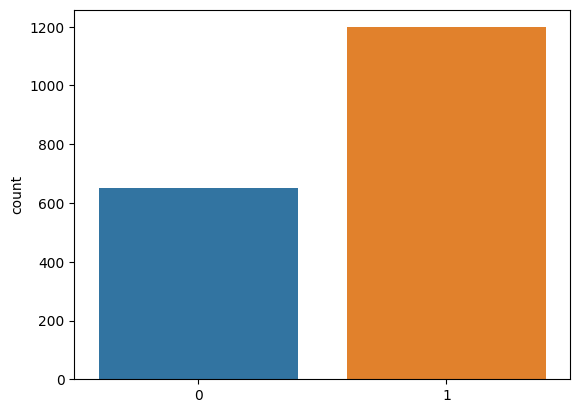

In [ ]:
dfcopy['Retained.in.2012.'] = dfcopy['Retained.in.2012.'].astype(int)
print(dfcopy['Retained.in.2012.'].dtype)
sns.countplot(x=dfcopy['Retained.in.2012.'].tolist())
print(dfcopy['Retained.in.2012.'].value_counts())

In [ ]:
from sklearn.utils import resample
df_majority = dfcopy[(dfcopy['Retained.in.2012.']==1)]
df_minority = dfcopy[(dfcopy['Retained.in.2012.']==0)]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 1198,
                                 random_state=0)

df_upssampled = pd.concat([df_minority_upsampled, df_majority])

int64
0    1198
1    1198
Name: Retained.in.2012., dtype: int64


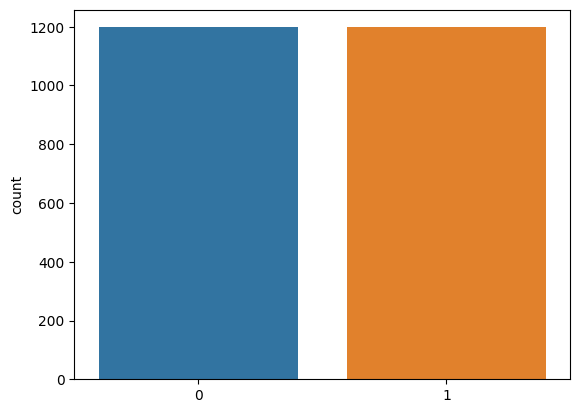

In [ ]:
df_upssampled['Retained.in.2012.'] = df_upssampled['Retained.in.2012.'].astype(int)
print(df_upssampled['Retained.in.2012.'].dtype)
sns.countplot(x=df_upssampled['Retained.in.2012.'].tolist())
print(df_upssampled['Retained.in.2012.'].value_counts()) #resample

In [ ]:
df_upssampled.shape

(2396, 50)

In [ ]:
X = df_upssampled.drop('Retained.in.2012.', axis=1)
Y = df_upssampled['Retained.in.2012.']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [ ]:
dfcopy.isnull().sum()

NPS 2011                          0
NPS 2010                          0
NPS 2009                          0
NPS 2008                          0
>= 10 FPP Date                    0
>= 20 FPP Date                    0
>= 35 FPP Date                    0
group_SizeRange                   0
Program.Code                      0
From.Grade                        0
To.Grade                          0
q_participating_grades            0
Group.State                       0
Is.Non.Annual.                    0
Special.Pay                       0
Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
Early.RPL                         0
Latest.RPL                        0
Total.Discount.Pax                0
Initial.System.Date               0
Region                            0
Parent.Meeting.Flag               0
MDR.High.Grade                    0
Total.School.Enrollment           0
Income.Level                      0
School.Sponsor              

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100, 2)), "%"

Accuracy Score : 75.83


(None, '%')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_predknn = knn.predict(X_test)

print('Precision en el set de entrenamiento: {:.2f}'
      .format(knn.score(X_train, Y_train)))
print('Prcision en el set de test: {:.2f}'
      .format(knn.score(X_test, y_test)))

Precision en el set de entrenamiento: 0.84
Prcision en el set de test: 0.71


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

print('Precision en el set de entrenamiento: {:.2f}'
      .format(gnb.score(X_train, Y_train)))
print('Prcision en el set de test: {:.2f}'
      .format(gnb.score(X_test, y_test)))

Precision en el set de entrenamiento: 0.77
Prcision en el set de test: 0.76


In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1, gamma=1)
svc.fit(X_train, Y_train)

SVC(C=1, gamma=1)

In [ ]:
y_predictsvc = svc.predict(X_test)

print('Precision en el set de Entrenamiento: {:.2f}'
      .format(svc.score(X_train, Y_train)))
print('Precisión en el set de Test: {:.2f}'
      .format(svc.score(X_test, y_test)))

Precision en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.86


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('Precision en el set de Entrenamiento: {:.2f}'
      .format(clf_gini.score(X_train, Y_train)))
print('Precision en el set de Test: {:.2f}'
      .format(clf_gini.score(X_test, y_test)))

Precision en el set de Entrenamiento: 0.80
Precision en el set de Test: 0.75


[Text(0.5, 0.875, 'x[1] <= 7.5\ngini = 0.5\nsamples = 1916\nvalue = [951, 965]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.385\nsamples = 1030\nvalue = [762, 268]'),
 Text(0.125, 0.375, 'x[16] <= 13.5\ngini = 0.498\nsamples = 345\nvalue = [163, 182]'),
 Text(0.0625, 0.125, 'gini = 0.465\nsamples = 182\nvalue = [115, 67]'),
 Text(0.1875, 0.125, 'gini = 0.416\nsamples = 163\nvalue = [48, 115]'),
 Text(0.375, 0.375, 'x[13] <= 0.5\ngini = 0.22\nsamples = 685\nvalue = [599, 86]'),
 Text(0.3125, 0.125, 'gini = 0.35\nsamples = 345\nvalue = [267, 78]'),
 Text(0.4375, 0.125, 'gini = 0.046\nsamples = 340\nvalue = [332, 8]'),
 Text(0.75, 0.625, 'x[30] <= 23.5\ngini = 0.336\nsamples = 886\nvalue = [189, 697]'),
 Text(0.625, 0.375, 'x[36] <= 278.5\ngini = 0.483\nsamples = 301\nvalue = [123, 178]'),
 Text(0.5625, 0.125, 'gini = 0.493\nsamples = 279\nvalue = [123, 156]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.875, 0.375, 'x[34] <= 21.5\ngini = 0.2\nsamples = 585

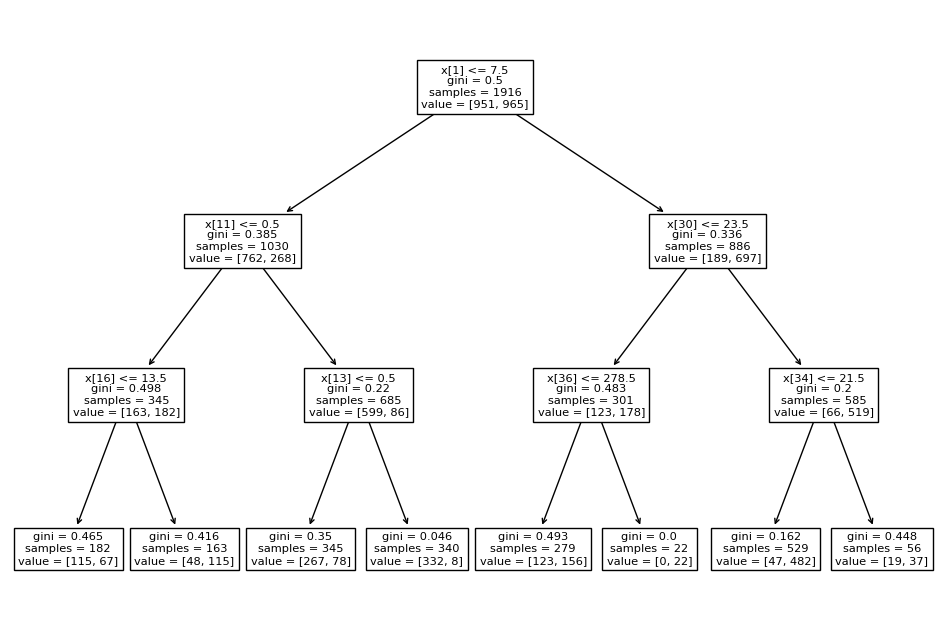

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train))

In [ ]:
import graphviz
import pydotplus
%matplotlib inline

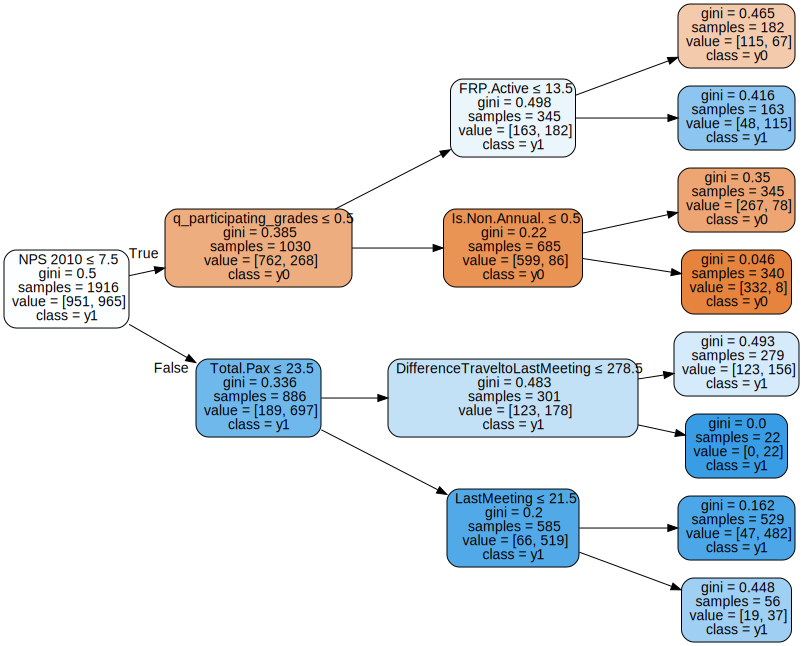

In [ ]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, Y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.90
